### Extract meaningful information about data to put into thesis

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

Set defaults for plotting better visuals

In [251]:
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":18,
                                "axes.titlesize":18,
                                "axes.labelsize":16})

Create colour palette

In [159]:
M_darkpurple = '#783CBB'
M_lightpurple = '#A385DB'
M_green = '#479C8A'
M_yellow = '#FFDD99'
M_lightpink = '#EFA9CD'
M_darkpink = '#E953AD'

colour_list = [M_lightpink, M_green, M_darkpurple, M_darkpink, M_lightpurple, M_yellow]
cd = {'lightpink': M_lightpink, 'lightpurple': M_lightpurple, 'green': M_green, 'purple': M_darkpurple, 'pink': M_darkpink, 'yellow': M_yellow}
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour_list)

Read in dataframe

In [3]:
svs_df = pd.read_excel('/Users/alexandrasmith/Desktop/Workspace/Projects/masters/data/processed/svs_data_info.xlsx')
svs_df.drop(['Unnamed: 0'], axis=1, inplace=True)
# display(svs_df)

In [4]:
patches_df = pd.read_excel('/Users/alexandrasmith/Desktop/Workspace/Projects/masters/data/processed/patches_data_info.xlsx')
patches_df.drop(['Unnamed: 0'], axis=1, inplace=True)
patches_df.drop(patches_df.tail(2).index, inplace=True)
# display(patches_df)

Combine the two dataframes, based on File_name

In [12]:
df = pd.merge(svs_df, patches_df, on='File_name')
display(df)

,File_name,Level0_factor,Level1_factor,Level2_factor,Level3_factor,Level0_height,Level0_width,Level1_height,Level1_width,Level2_height,...,Level3_width,Patch_size,Stride,Total_num_of_patches,Num_of_patches_discarded,Num_of_benign_tiles,Num_of_tumourous_tiles,Total num of remaining patches,% benign,% tumourous
0,TCGA-A8-A09K-01Z-00-DX1,1.0,4.000000,16.000000,32.000000,49408,81408,12352,20352,3088,...,2544.0,256.0,256.0,3792.0,2695.0,217,880,1097,19.781222,80.218778
1,TCGA-A1-A0SP-01Z-00-DX1,1.0,4.000037,16.001438,32.005217,90504,109434,22626,27358,5656,...,3419.0,256.0,256.0,9328.0,3923.0,2489,2916,5405,46.049954,53.950046
2,TCGA-A2-A0YG-01Z-00-DX1,1.0,4.000051,16.002389,32.004777,77998,100812,19499,25203,4874,...,3150.0,256.0,256.0,7448.0,5818.0,316,1314,1630,19.386503,80.613497
3,TCGA-A2-A0CX-01Z-00-DX1,1.0,4.000133,16.001814,32.003627,81606,71819,20401,17954,5100,...,2244.0,256.0,256.0,5530.0,4301.0,372,857,1229,30.268511,69.731489
4,TCGA-A2-A0EY-01Z-00-DX1,1.0,4.000053,16.001258,32.002516,91820,112995,22955,28248,5738,...,3531.0,256.0,256.0,9790.0,3270.0,2631,3889,6520,40.352761,59.647239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,TCGA-E9-A249-01Z-00-DX1,1.0,4.000054,16.001208,32.002416,74662,113288,18665,28322,4666,...,3540.0,256.0,256.0,7920.0,4015.0,216,3689,3905,5.531370,94.468630
143,TCGA-EW-A1P4-01Z-00-DX1,1.0,4.000110,16.001159,32.002318,81190,98631,20297,24657,5074,...,3082.0,256.0,256.0,7584.0,4478.0,2939,167,3106,94.623310,5.376690
144,TCGA-EW-A1PA-01Z-00-DX1,1.0,4.000086,16.000672,32.004568,79409,98055,19852,24513,4963,...,3064.0,256.0,256.0,7315.0,3784.0,2023,1508,3531,57.292552,42.707448
145,TCGA-EW-A1PD-01Z-00-DX1,1.0,4.000100,16.001426,32.002853,85834,113287,21458,28321,5364,...,3540.0,256.0,256.0,9130.0,6137.0,2440,553,2993,81.523555,18.476445


Get all columns names

In [6]:
cols=[]
for col in df.columns:
    cols.append(col)
print(cols)

['File_name', 'Level0_factor', 'Level1_factor', 'Level2_factor', 'Level3_factor', 'Level0_height', 'Level0_width', 'Level1_height', 'Level1_width', 'Level2_height', 'Level2_width', 'Level3_height', 'Level3_width', 'Patch_size', 'Stride', 'Total_num_of_patches', 'Num_of_patches_discarded', 'Num_of_benign_tiles', 'Num_of_tumourous_tiles', 'Total num of remaining patches', '% benign', '% tumourous']


## Histograms

Text(0, 0.5, 'Number of slides')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


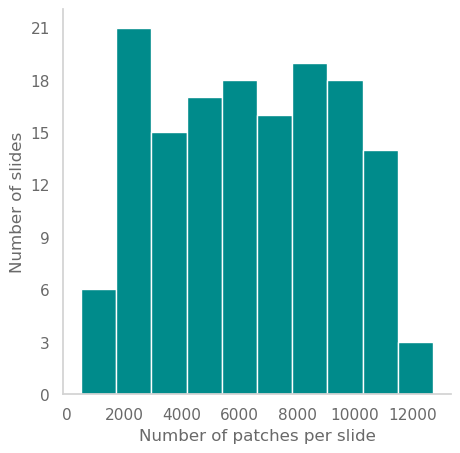

In [147]:
plt.rcParams["figure.figsize"] = [5, 5]
ax = plt.figure().gca()
ax.hist(df['Total_num_of_patches'], color='darkcyan')
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xlabel('Number of patches per slide')
ax.set_ylabel('Number of slides')

In [37]:
fig = px.histogram(df['Total_num_of_patches'],
                   labels={
                     "value": "Number of patches",
                     "count": "Number of slides"
                    }, 
                   color_discrete_sequence=['darkcyan'])
fig.update_layout(title={
        'text': "Total number of patches per slide",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        showlegend=False,
        xaxis_tickformat=",.0f")
fig.show()

Text(0, 0.5, 'Number of slides')

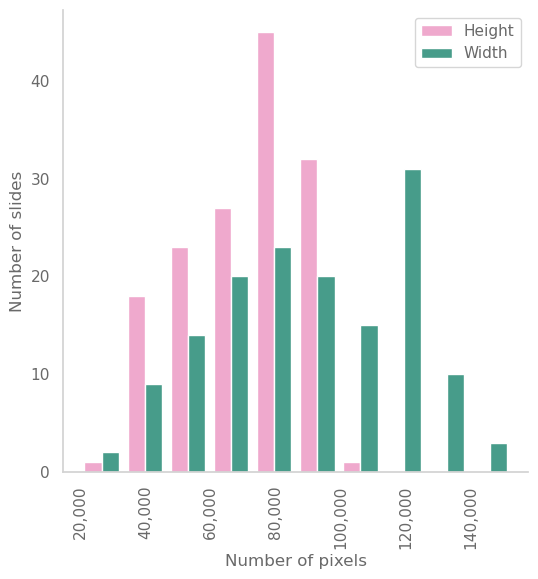

In [150]:
x = df['Level0_height']
y = df['Level0_width']
total_pixels_l0 = x * y

plt.rcParams["figure.figsize"] = [6, 6]
ax = plt.figure().gca()
ax.hist([x, y])
# ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
# formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
# formatter.set_scientific(False)
# ax.xaxis.set_major_formatter(formatter)
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', labelrotation=90.0)
ax.legend(labels=['Height', 'Width'])
ax.set_xlabel('Number of pixels')
ax.set_ylabel('Number of slides')

In [258]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['Level0_height'], marker_color=cd['pink'], name="height"))
fig.add_trace(go.Histogram(x=df['Level0_width'], marker_color=cd['green'], name="width"))

# The two histograms are drawn on top of another
fig.update_layout(title={
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title_text='Number of pixels',
        xaxis_tickformat=",.0f",
        yaxis_title_text='Number of slides',
        barmode='stack', 
        width=700,
        margin=dict(l=50, r=50, b=50, t=20))
fig.update_traces(opacity=0.8)
fig.show()

Text(0, 0.5, 'Number of slides')

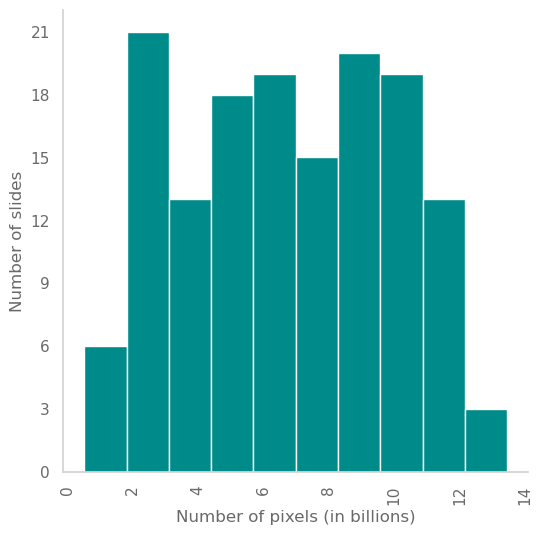

In [151]:
ax = plt.figure().gca()
pixels = x*y
ax.hist(pixels, color=['darkcyan'])
# formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
# lambda x: '{:.0f}'.format(x*status.sum()/100)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000000:.0f}')
# formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.tick_params(axis='x', labelrotation=90.0)
ax.set_xlabel('Number of pixels (in billions)')
ax.set_ylabel('Number of slides')

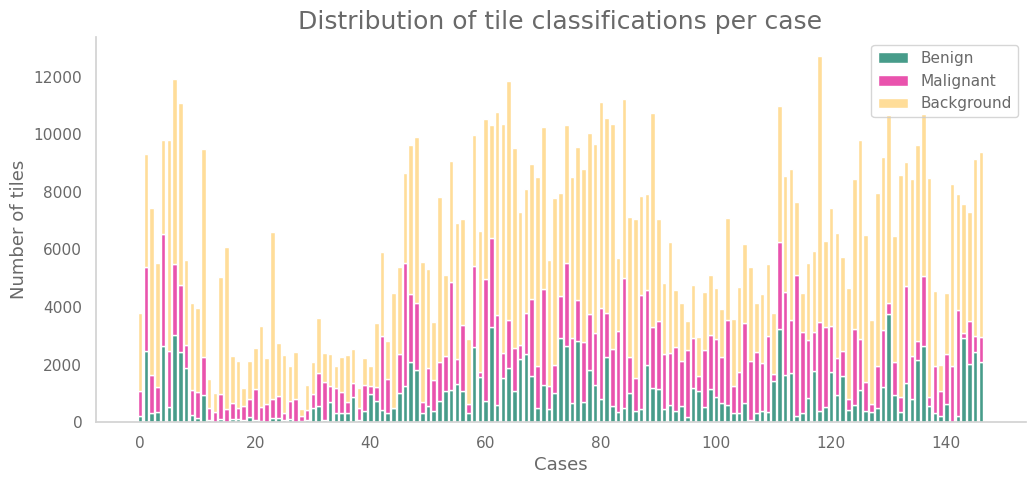

In [243]:
x = df['Num_of_benign_tiles']
y = df['Num_of_tumourous_tiles']
background = df['Total_num_of_patches'] - x - y
instances = np.arange(len(x))
plt.rcParams["figure.figsize"] = [12, 5]
bar_width=0.8
ax = plt.figure().gca()
ax.bar(instances, x, width=bar_width, label='Benign', color=cd['green'])
ax.bar(instances, y, width=bar_width, label='Malignant', color=cd['pink'], bottom=x)
ax.bar(instances, background, width=bar_width, label='Background', color=cd['yellow'], bottom=np.add(x, y))
# ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
# formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
# formatter.set_scientific(False)
# ax.xaxis.set_major_formatter(formatter)
# formatter = ticker.StrMethodFormatter('{x:,.0f}')
# ax.xaxis.set_major_formatter(formatter)
# ax.tick_params(axis='x', labelrotation=90.0)
ax.legend()
ax.set_xlabel('Cases')
ax.set_ylabel('Number of tiles')
plt.title('Distribution of tile classifications per case')
# plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/masters/reports/data figs/patch_classifications_bar.png')


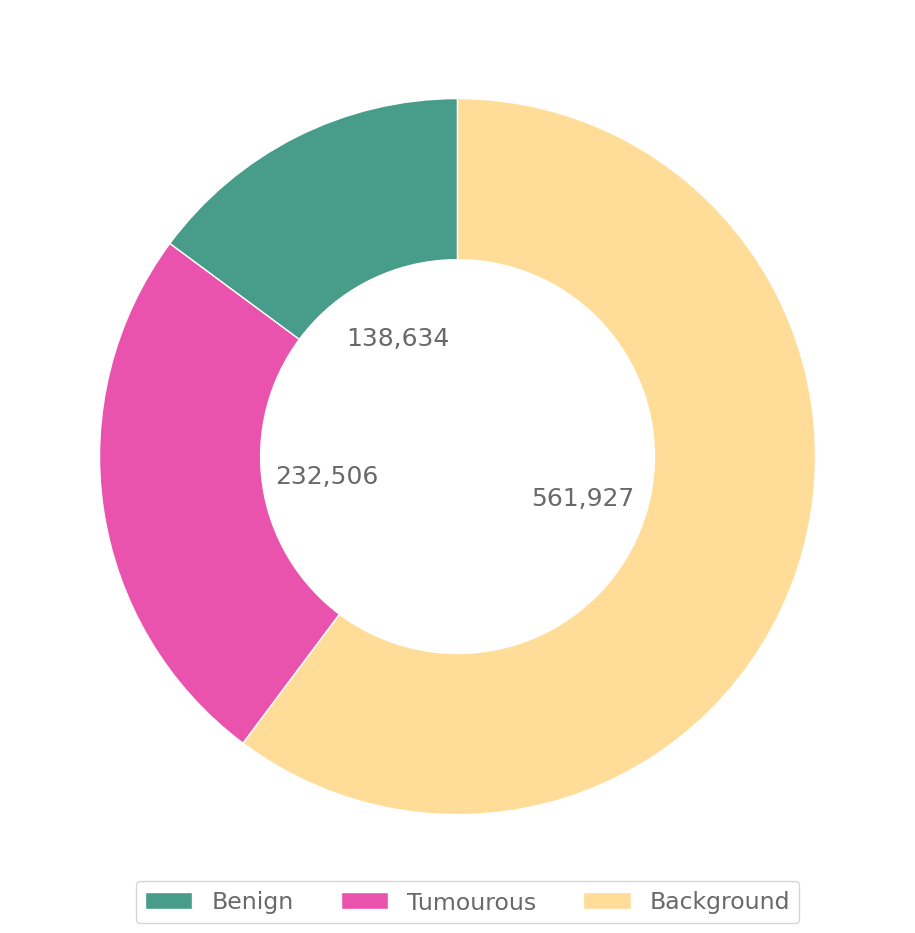

In [253]:
plt.rcParams["figure.figsize"] = [10, 10]
total_benign = df['Num_of_benign_tiles'].sum()
total_tumourous = df['Num_of_tumourous_tiles'].sum()
total_background = df['Num_of_patches_discarded'].sum()
total_patches = total_benign + total_tumourous + total_background
plt.pie([total_benign, total_tumourous, total_background], colors=[cd['green'], cd['pink'], cd['yellow']], startangle=90, autopct=lambda x: '{:,.0f}'.format(x*total_patches/100), labeldistance=1.2, pctdistance=0.37)
# plt.pie(status, colors=['mediumpurple', 'mediumaquamarine'], startangle=90, autopct=lambda x: '{:.2f}%'.format(x))
plt.legend(labels=['Benign', 'Tumourous', 'Background'], fontsize=17, bbox_to_anchor=(0.51,0.08), loc="center", bbox_transform=plt.gcf().transFigure, ncol=3)

#draw circle
centre_circle = plt.Circle((0,0),0.550,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# plt.axis('equal')  
plt.tight_layout()
# plt.title("Patch classifications", x=0.5, y=0.97)
# plt.show()
# plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/masters/reports/data figs/patch_classifications_pie.png')

In [77]:
fig = go.Figure()
fig.add_trace(go.Histogram(y=df['Num_of_benign_tiles'], marker_color="darkcyan", name="Benign"))
fig.add_trace(go.Histogram(y=df['Num_of_tumourous_tiles'], marker_color="plum", name="Tumorous"))
fig.add_trace(go.Histogram(y=df['Num_of_patches_discarded'], marker_color="khaki", name="Background"))

# The two histograms are drawn on top of another
fig.update_layout(title={
        'text': "Number of tiles per class per case",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        # xaxis_title_text='Cases',
        xaxis_tickformat=",.0f",
        barmode='stack', 
        width=700,
        margin=dict(l=50, r=50, b=50, t=50))
fig.update_traces(opacity=0.8)
fig.show()

Text(0.5, 0, '% of background patches per image')

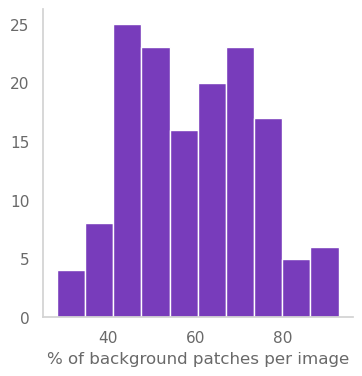

In [174]:
# Caluclaute percentage of background pixels per image
background_patches = df['Num_of_patches_discarded']
total_patches = df['Total_num_of_patches']

percentage_background = (background_patches/total_patches) * 100

ax = plt.figure().gca()

ax.hist(percentage_background, color=cd['purple'])
# formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
# lambda x: '{:.0f}'.format(x*status.sum()/100)
# formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000000:.0f}')
# formatter.set_scientific(False)
# ax.xaxis.set_major_formatter(formatter)
# ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
# ax.tick_params(axis='x', labelrotation=90.0)
ax.set_xlabel('% of background patches per image')
# ax.set_ylabel('Number of slides')

Next, calculate some statistics about the dimensions of the GIVEN images (i.e. at level 0)

In [ ]:
# Calculate average width, height

# Calculate average number of pixels

# Show distribution of image sizes/number of pixels

Also, calculate some information about images I am working with (i.e. level 1)

In [ ]:
# * idea: calculate the average size of the images used (in GBs)

## HER2 data

In [79]:
her2_df = pd.read_excel('/Users/alexandrasmith/Desktop/Workspace/Projects/masters/data/raw/HER2DataInfo.xlsx')
her2_df.drop(['Source', 'My ID'], axis=1, inplace=True)
# patches_df.drop(['Unnamed: 0'], axis=1, inplace=True)
display(her2_df.head())

,Case ID,Clinical.HER2.status,HER2A.status,Unnamed: 5,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,TCGA-A1-A0SP-01Z-00-DX1,Negative,non-HER2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-A2-A04W-01Z-00-DX1,Positive,HER2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-A2-A04X-01Z-00-DX1,Positive,HER2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-A2-A0CX-01Z-00-DX1,Positive,HER2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-A2-A0EY-01Z-00-DX1,Positive,HER2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Delete NaN columns
for col in her2_df.columns:
   if her2_df[col].isnull().all():
     her2_df.drop([col], axis=1, inplace=True)

# Rename column to match previous dataframes
her2_df.rename(columns = {'Case ID':'File_name'}, inplace = True)

# display(her2_df.head())

In [81]:
# Keep only file names used for my project
file_names = df['File_name']
her2_filtered = her2_df[her2_df['File_name'].isin(file_names)]

## Pie chart

Create a pie chart for number of patches that are HER2+-

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


Positive    77
Negative    70
Name: Clinical.HER2.status, dtype: int64


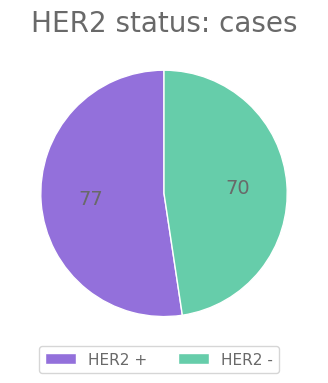

In [172]:
# Create pie chart
# can increase figsize for better resolution (for final saved image)
plt.rcParams["figure.figsize"] = [4, 4]
col_name = 'Clinical.HER2.status'
status_counts = her2_filtered[col_name].value_counts()
print(status_counts)
plt.pie(status_counts, colors=['mediumpurple', 'mediumaquamarine'], startangle=90, autopct=lambda x: '{:.0f}'.format(x*status_counts.sum()/100))
# plt.pie(status, colors=['mediumpurple', 'mediumaquamarine'], startangle=90, autopct=lambda x: '{:.2f}%'.format(x))
plt.legend(labels=['HER2 +', 'HER2 -'], bbox_to_anchor=(0.5,0.08), loc="center", bbox_transform=plt.gcf().transFigure, ncol=2)
plt.title("HER2 status: cases")
plt.show()

In [175]:
fig = px.pie(names=status_counts.index, values=status_counts.values, 
             color_discrete_map={'Positive':'darkcyan', 'Negative':'plum'})
fig.update_layout(title={
        'text': "Number of cases per HER2 status",
        'y':0.92,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'},
        width=600,
        margin=dict(l=50, r=50, b=30, t=80))
fig.show()

Pie chart comparing number of benign and tumorous tiles available

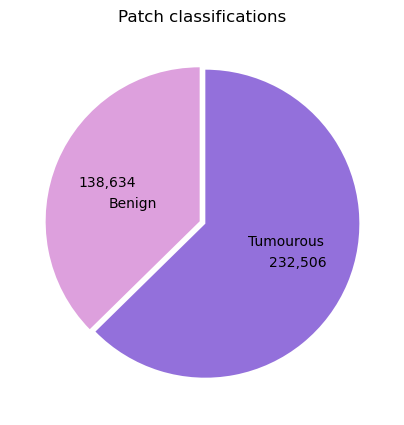

In [42]:
plt.rcParams["figure.figsize"] = [5, 5]
total_benign = df['Num_of_benign_tiles'].sum()
total_tumourous = df['Num_of_tumourous_tiles'].sum()
total_patches = total_benign + total_tumourous
plt.pie([total_benign, total_tumourous], labels=['Benign', 'Tumourous'], colors=['plum', 'mediumpurple'], explode=[0.02, 0.02], startangle=90, autopct=lambda x: '{:,.0f}'.format(x*total_patches/100), labeldistance=0.3, pctdistance=0.65)
# plt.pie(status, colors=['mediumpurple', 'mediumaquamarine'], startangle=90, autopct=lambda x: '{:.2f}%'.format(x))
# plt.legend(labels=['Benign', 'Tumourous'], bbox_to_anchor=(0.5,0.08), loc="center", bbox_transform=plt.gcf().transFigure, ncol=2)
plt.title("Patch classifications")
plt.show()

## Matplotlib mosaic

<BarContainer object of 3 artists>

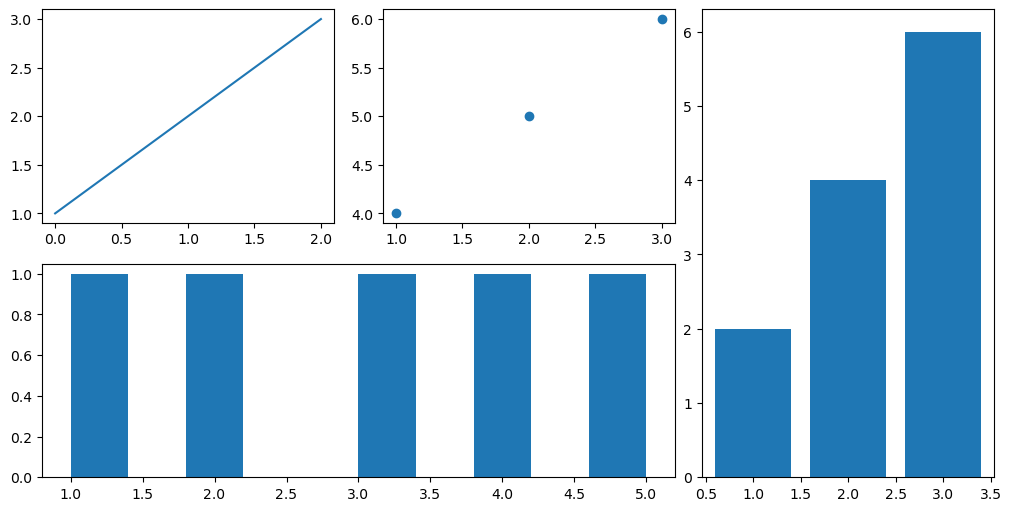

In [48]:
plt.rcParams["figure.figsize"] = [10, 5]
fig = plt.figure(layout='constrained')
mosaic = """
        abd
        ccd
        """
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict['a'].plot([1, 2, 3])
ax_dict['b'].scatter([1, 2, 3], [4, 5, 6])
ax_dict['c'].hist([1, 2, 3, 4, 5])
ax_dict['d'].bar([1, 2, 3], [2, 4, 6])

### Save .png of WSIs

In [2]:
import os
from openslide import open_slide

img_dir = '/Volumes/AlexS/MastersData/SVS files/'
svs_files = os.listdir(img_dir)
save_dest = '/Users/alexandrasmith/Library/CloudStorage/OneDrive-StellenboschUniversity/Stellies/Masters/Visuals/WSI pngs/'

plt.rcParams['figure.dpi']=300

for img in svs_files:
    if os.path.isfile(save_dest + img.replace('.svs', '') + '.png'):
        continue
    else:
        # corrupt file
        if img.startswith('TCGA-BH-A0B4'):
            continue
        else:
            print(img)
            slide = open_slide(img_dir + img)
            slide_thumb = slide.get_thumbnail(size=(5000, 5000))
            plt.imshow(np.array(slide_thumb))
            plt.axis('off')
            plt.savefig(save_dest + img.replace('.svs', '') + '.png', bbox_inches='tight')